# Hello, 
## My name is Kyle Air and welcome to my Jupyter Notebook!
This is a personal project I worked on in some spare time and I thank you for taking the time to check it out. In this notebook I use some historical NHL datasets I found on Kaggle (links to dataset can be found in README). The project looks at players who have the highest career PPG (Points Per Game) and displays the number of awards they received throughout their career. For my own interest I am looking to see which high PPG players were recognized with many awards and to see which high PPG players were less recognized by awards. Similarly I rearrange the data to see which players received many awards with a low PPG measure.

I orgininally wrote this code in VSCode on my own machine but figured I'd create a notebook to share with others. The original code was organized differently but I rearranged to make it a more logical notebook order.  I try to explain what each code cell is doing with a markdown cell right before and have left some comments from the initial code in as well.

Importing necessary libraries

In [107]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in csv files as dataframes

In [108]:
scoredata = pd.read_csv("HockeyData/Scoring.csv")
awarddata = pd.read_csv("HockeyData/AwardsPlayers.csv")
namedata = pd.read_csv("HockeyData/Master.csv")

First we will deal with the scoredata, first step is to delete all unnecessary columns.\
In this case we will only need the playerID, games played and points - column index 0, 6 and 9 respectively.

In [109]:
toDelete = [1, 2, 3, 4, 5, 7, 8, 10, 11 ,12 ,13, 14, 15, 16 ,17, 18, 19, 20, 21, 22,23,24,25,26,27,28,29,30] 
scoredata = scoredata.drop(scoredata.columns[toDelete], axis=1) #drop toDelete columns from dataframe

The data contains seperate rows for each season a player has played but we are only interested in career totals. To get career totals we will add all the individual entries for the same playerID.

In [110]:
aggregation_functions = {'GP': 'sum', 'Pts': 'sum'} #declare use of sum to aggregate games played (GP) and points (Pts)
df = scoredata.groupby(scoredata['playerID']).aggregate(aggregation_functions) #aggregate all entries with same playerID 

Now we will filter out entries deemed inaccurate. In my opinion I believe any player with less than 250 career points does not have a large enough sample size thus we will remove those entries. 

In [111]:
indexNames = df[df['Pts']<250].index 
df.drop(indexNames, inplace=True)

With only the players we are interested remaining we will now generate a PPG column calculated using each players total points and total games. 

In [112]:
#Create new empty list to hold PtsPG    
PtsPG = []
    
#Populate list by going through each df entry and calculating corresponding PtsPG
    
for i in range(len(df.index)):
    PtsPG.append((df.iloc[i]['Pts'])/(df.iloc[i]['GP']))
    
#Create new column in the df using PtsPG list
df['PtsPG'] = PtsPG
    
#Create final "scoredata" df organized by PtsPG
scoredata = df.sort_values('PtsPG',ascending=False)
print(scoredata.head(15))

               GP     Pts     PtsPG
playerID                           
gretzwa01  1567.0  2967.0  1.893427
lemiema01   915.0  1723.0  1.883060
taylocy01   164.0   284.0  1.731707
malonjo01   250.0   380.0  1.520000
bossymi01   752.0  1126.0  1.497340
lalonne01   297.0   442.0  1.488215
crosbsi01   434.0   609.0  1.403226
orrbo01     657.0   915.0  1.392694
nilssul01   470.0   653.0  1.389362
cloutre01   686.0   910.0  1.326531
dionnma01  1348.0  1771.0  1.313798
stastpe01   977.0  1239.0  1.268168
nilsske01   711.0   900.0  1.265823
forsbpe01   708.0   885.0  1.250000
esposph01  1282.0  1590.0  1.240250


Now that we have our scoredata cleaned up we will work on cleaning up the awarddata. First we will delete the awards that are not performance based as I am only interested in awards for on-ice recognition.

In [113]:
#Some awards are not performance based, we will remove those
#Awards to delete - Deneau, King Clancy, Lady Byng, Masterton, Messier
deletelist = ['Deneau', 'King Clancy', 'Lady Byng', 'Masterton', 'Messier']

for names in deletelist:
    indexNames = awarddata[awarddata['award']==names].index
    awarddata.drop(indexNames, inplace=True)
    
print(awarddata.head(15))

     playerID     award  year lgID note  pos
0   malonjo01  Art Ross  1917  NHL  NaN  NaN
1   cleghod01  Art Ross  1918  NHL  NaN  NaN
2   malonjo01  Art Ross  1919  NHL  NaN  NaN
3   lalonne01  Art Ross  1920  NHL  NaN  NaN
4   broadpu01  Art Ross  1921  NHL  NaN  NaN
5     dyeba01  Art Ross  1922  NHL  NaN  NaN
6   dennecy01  Art Ross  1923  NHL  NaN  NaN
7   nighbfr01      Hart  1923  NHL  NaN  NaN
8     dyeba01  Art Ross  1924  NHL  NaN  NaN
9   burchbi01      Hart  1924  NHL  NaN  NaN
11  stewane01  Art Ross  1925  NHL  NaN  NaN
12  stewane01      Hart  1925  NHL  NaN  NaN
14   cookbi01  Art Ross  1926  NHL  NaN  NaN
15  gardihe01      Hart  1926  NHL  NaN  NaN
17  hainsge01    Vezina  1926  NHL  NaN  NaN


Now we must add up the number of times each 'PlayerID' appears to count the total number of Awards that player has received

In [114]:
newdf = awarddata['playerID'].value_counts(sort = False)
sortedlist = sorted(newdf.items() , key = lambda t:t[1])
sortedlist.reverse()
awarddata = pd.DataFrame(sortedlist, columns = ['playerID', 'Awards'])
print(awarddata.head(15))

     playerID  Awards
0   gretzwa01      46
1    howego01      36
2   lemiema01      27
3     orrbo01      26
4   bourqra01      25
5    hullbo01      24
6   lidstni01      21
7   hasekdo01      20
8   harvedo01      18
9     roypa01      18
10   jagrja01      18
11  brodema01      18
12  esposph01      17
13  ovechal01      16
14   hallgl01      16


The raw data uses "playerID" to identify players but it would be better to see their full name. There is no full name column so we will create one using the first and last name columns in the 'namedata' dataframe and then remove all unnecessary columns. 

In [115]:
namedata["playerName"] = namedata["firstName"] + " " + namedata["lastName"]
deletelist = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
namedata = namedata.drop(namedata.columns[deletelist], axis=1)
print(namedata.head(15))

     playerID            playerName
0   aaltoan01           Antti Aalto
1   abbeybr01           Bruce Abbey
2   abbotge01         George Abbott
3   abbotre01            Reg Abbott
4   abdelju01     Justin Abdelkader
5    abelcl01         Clarence Abel
6    abelge01            Gerry Abel
7    abelsi01              Sid Abel
8   abgrade01        Dennis Abgrall
9    abidra01            Ramzi Abid
10  abrahch01  Christer Abrahamsson
11  abrahth01    Thommy Abrahamsson
12  achtyge01      Gene Achtymichuk
13  acombdo01            Doug Acomb
14  actonke01           Keith Acton


Now we will merge the three dataframes to one master dataframe and use playerName as index

In [116]:
finaldata = pd.merge(scoredata, awarddata, on='playerID', how='right')
finaldata = pd.merge(finaldata, namedata, on='playerID', how='right')
finaldata.set_index('playerName', drop=True,inplace=True)
print(finaldata.head(15))

                 playerID      GP     Pts     PtsPG  Awards
playerName                                                 
Wayne Gretzky   gretzwa01  1567.0  2967.0  1.893427    46.0
Mario Lemieux   lemiema01   915.0  1723.0  1.883060    27.0
Joe Malone      malonjo01   250.0   380.0  1.520000     2.0
Mike Bossy      bossymi01   752.0  1126.0  1.497340    10.0
Newsy Lalonde   lalonne01   297.0   442.0  1.488215     1.0
Sidney Crosby   crosbsi01   434.0   609.0  1.403226     7.0
Bobby Orr         orrbo01   657.0   915.0  1.392694    26.0
Ulf Nilsson     nilssul01   470.0   653.0  1.389362     3.0
Real Cloutier   cloutre01   686.0   910.0  1.326531     6.0
Marcel Dionne   dionnma01  1348.0  1771.0  1.313798     7.0
Peter Stastny   stastpe01   977.0  1239.0  1.268168     1.0
Kent Nilsson    nilsske01   711.0   900.0  1.265823     1.0
Peter Forsberg  forsbpe01   708.0   885.0  1.250000     8.0
Phil Esposito   esposph01  1282.0  1590.0  1.240250    17.0
Evgeni Malkin   malkiev01   427.0   527.

With our data all cleaned and consolidated we will now define a data visualization function to plot our processed data. We can resuse this function whenever we rearrange our 'finaldata' and we will accept a 'title' parameter to name the graph and a 'numPlayers' paramter to choose the number of entries we want to see.

In [117]:
def dataVisualization(title, numPlayers):
    global finaldata
    
    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax2 = ax.twinx()

    width = 0.4 

    finaldata.head(numPlayers).PtsPG.plot(kind='bar', color='red', ax=ax, width = width, position=1)
    finaldata.head(numPlayers).Awards.plot(kind='bar', color='blue', ax=ax2, width = width, position=0)

    ax.set_ylabel('Points Per Game')
    ax2.set_ylabel('# of Awards')
    ax.set_xlabel('Player Name')
    
    ax.legend(loc = 'upper right')
    ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 0.41, 0.5, 0.5))

    plt.tight_layout()
    plt.title(title)

    plt.show()

We can now use this function to see graphs of different subsets of our data. Currently our data is arranged by highest PPG. We will view this subset first and input 15 as the 'numPlayers' parameter to veiw the top 15 PPG players.

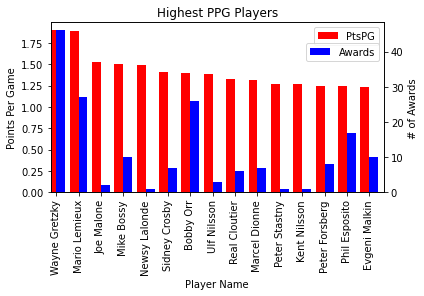

In [118]:
dataVisualization('Highest PPG Players', 15)

It is interesting to see some of the top PPG players in NHL history have <5 awards. A likely explanation would be that these players had great efficiency but a relatively short career making it difficult for them to accumulate awards. 

Let's now rearrange the data to see the 20 players with the most awards.

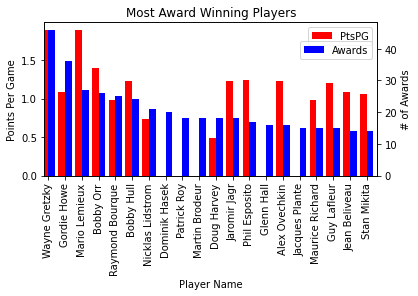

In [119]:
finaldata = finaldata.sort_values('Awards',ascending=False)
dataVisualization('Most Award Winning Players', 20)

It is interesting to note that some of these players have 0 PPG. How are they in the top 20 most awarded NHL players ever with 0 PPG? The explanation is that these players are goalies. 

Let's now arrange the data by games played to see how the players with the longest NHL careers performed.

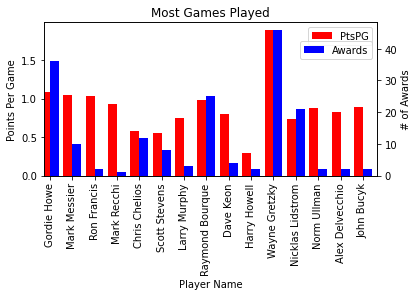

In [120]:
finaldata = finaldata.sort_values('GP',ascending=False)
dataVisualization('Most Games Played', 15)

In this graph Wayne Gretzky stands out with both his PPG and Awards towering the other entries. He is the 11th entry meaning he has played the 11th most games of all players in our current dataset. Our current dataset consists of 7761 unique players. It is truly a testiment to how great Wayne Gretzky is as he managed to maintain the highest PPG ever throughout one of the longest careers ever. It is no coincidence he is widely considered to be the greatest hockey player of all time.

Thanks for checking out my notebook. There is plenty more that can be done with this data and many more insights that can be drawn but I felt this was a good display of elementary data manipulation and visualization skills. It allowed me to visualize some statistics I was personally curious about. You can contact me with any questions you may have at kyleair8@gmail.com.